In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1]:
INPUT_PATH = '../result/'

In [36]:
class FrequencyCheck:
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name
        self.file_path = f'{INPUT_PATH}/{self.dataset_name}.csv'
        self.df = pd.read_csv(self.file_path)


    def check_occurance_by_range(self, initial_unit = int(1e4)):
        unit = int(initial_unit)
        print(f'* Ranges are in intervals of {unit:,} *')
        
        total_count_list = np.array(self.df['total_count'].to_list())
        range_max = np.array(int((max(total_count_list) // unit + 1) * unit))
        while range_max > 0:
            assert unit > 0, f'unit should be bigger than 0, now {unit}'

            range_min = np.array(range_max - unit)
            count_in_range = np.sum((range_min <= total_count_list) & (total_count_list < range_max))
            count_accumulated = np.sum((range_min <= total_count_list))
            if count_in_range > 0:
                print(f'[{range_min:.0e}, {range_max:.0e}): {count_in_range:,}, {count_accumulated:,}')

            range_max = range_min
            if range_max // unit == 1 and unit > 100:
                unit = unit // 10
                print('-' * 30)
                print(f'* Ranges are in intervals of {unit:,} *')


    def visualize(self):
        plt.figure(figsize = (12, 9))
        plt.hist(self.df['total_count'].to_list(), bins = 100)
        plt.title(f'Distribution of the Number of Occurances - {self.dataset_name}')
        plt.xlabel('n of occurances')
        plt.ylabel('n of artists')
        plt.show()


* Ranges are in intervals of 10,000 *
[2e+05, 2e+05): 1, 1
[2e+05, 2e+05): 1, 2
[1e+05, 1e+05): 1, 3
[8e+04, 9e+04): 1, 4
[6e+04, 7e+04): 1, 5
[4e+04, 5e+04): 1, 6
[3e+04, 4e+04): 1, 7
[2e+04, 3e+04): 6, 13
[1e+04, 2e+04): 20, 33
------------------------------
* Ranges are in intervals of 1,000 *
[9e+03, 1e+04): 6, 39
[8e+03, 9e+03): 3, 42
[7e+03, 8e+03): 9, 51
[6e+03, 7e+03): 4, 55
[5e+03, 6e+03): 16, 71
[4e+03, 5e+03): 19, 90
[3e+03, 4e+03): 16, 106
[2e+03, 3e+03): 25, 131
[1e+03, 2e+03): 27, 158
------------------------------
* Ranges are in intervals of 100 *
[9e+02, 1e+03): 5, 163
[8e+02, 9e+02): 8, 171
[7e+02, 8e+02): 2, 173
[6e+02, 7e+02): 4, 177
[5e+02, 6e+02): 4, 181
[4e+02, 5e+02): 9, 190
[3e+02, 4e+02): 6, 196
[2e+02, 3e+02): 11, 207
[1e+02, 2e+02): 11, 218
[0e+00, 1e+02): 95, 313


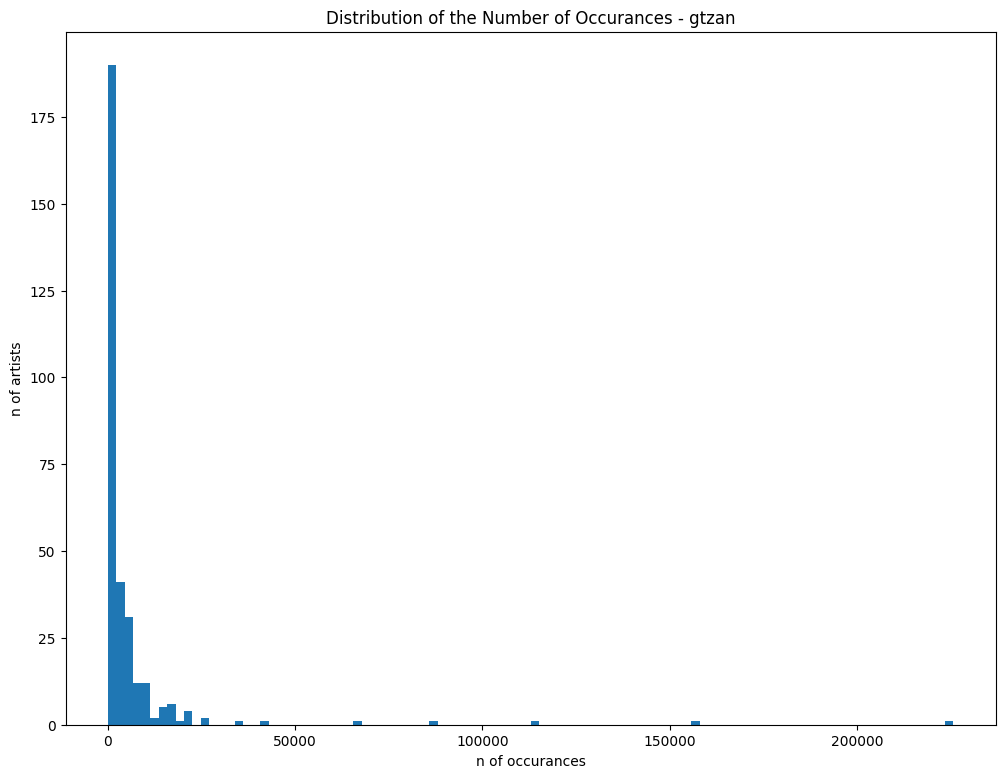

In [38]:
# gtzan
gtzan_freq = FrequencyCheck('gtzan')
gtzan_freq.check_occurance_by_range()
gtzan_freq.visualize()

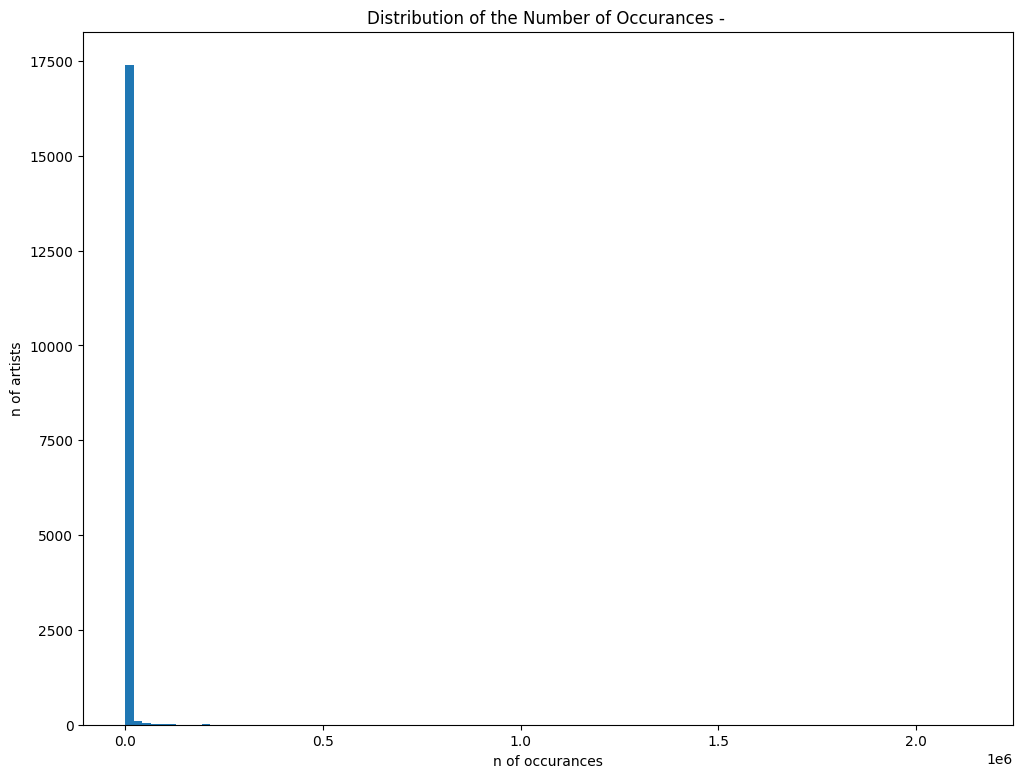

In [12]:
# olga
olga_freq = FrequencyCheck('olga')
olga_freq.visualize()

* Ranges are in intervals of 10,000 *
[4e+05, 4e+05): 1, 1
[3e+05, 3e+05): 1, 2
[2e+05, 2e+05): 1, 3
[2e+05, 2e+05): 1, 4
[2e+05, 2e+05): 2, 6
[2e+05, 2e+05): 1, 7
[1e+05, 2e+05): 1, 8
[1e+05, 1e+05): 1, 9
[8e+04, 9e+04): 1, 10
[5e+04, 6e+04): 1, 11
[4e+04, 5e+04): 4, 15
[2e+04, 3e+04): 8, 23
[1e+04, 2e+04): 18, 41
------------------------------
* Ranges are in intervals of 1,000 *
[9e+03, 1e+04): 7, 48
[8e+03, 9e+03): 7, 55
[7e+03, 8e+03): 12, 67
[6e+03, 7e+03): 10, 77
[5e+03, 6e+03): 16, 93
[4e+03, 5e+03): 25, 118
[3e+03, 4e+03): 39, 157
[2e+03, 3e+03): 81, 238
[1e+03, 2e+03): 204, 442
------------------------------
* Ranges are in intervals of 100 *
[9e+02, 1e+03): 31, 473
[8e+02, 9e+02): 43, 516
[7e+02, 8e+02): 34, 550
[6e+02, 7e+02): 45, 595
[5e+02, 6e+02): 73, 668
[4e+02, 5e+02): 61, 729
[3e+02, 4e+02): 78, 807
[2e+02, 3e+02): 113, 920
[1e+02, 2e+02): 126, 1,046
[0e+00, 1e+02): 364, 1,410


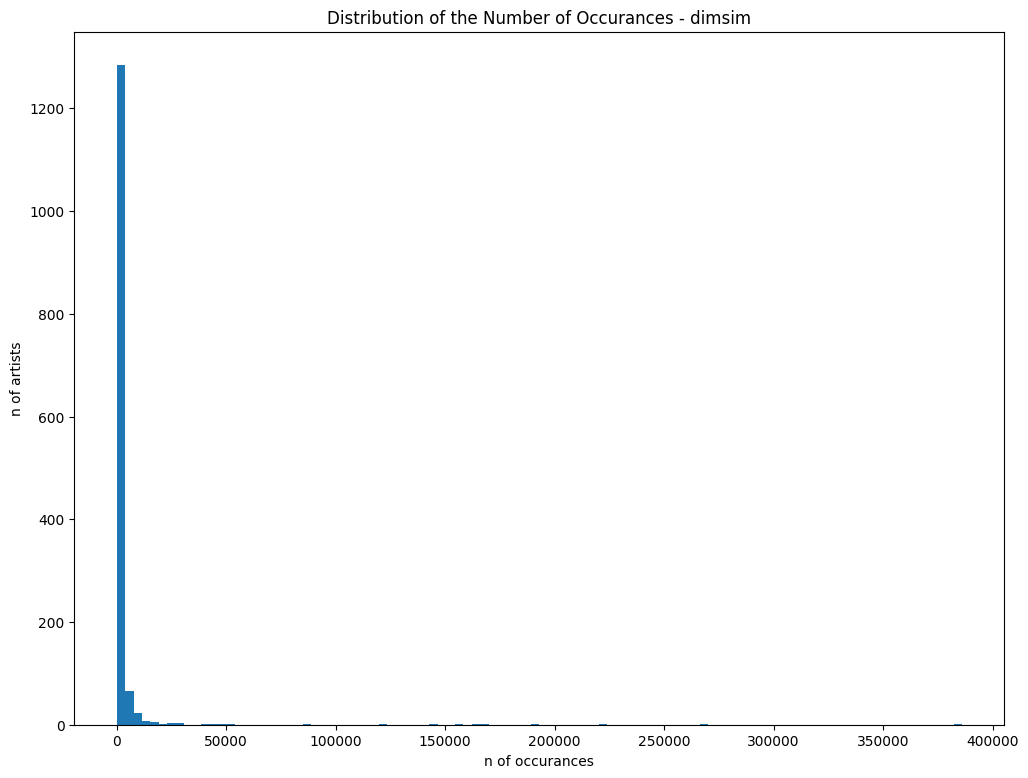

In [37]:
# dimsim
dimsim_freq = FrequencyCheck('dimsim')
dimsim_freq.check_occurance_by_range()
dimsim_freq.visualize()

* Ranges are in intervals of 100,000,000 *
[5e+08, 6e+08): 1, 1
[3e+08, 4e+08): 4, 5
[2e+08, 3e+08): 1, 6
[1e+08, 2e+08): 2, 8
------------------------------
* Ranges are in intervals of 10,000,000 *
[8e+07, 9e+07): 1, 9
[7e+07, 8e+07): 1, 10
[5e+07, 6e+07): 3, 13
[4e+07, 5e+07): 3, 16
[3e+07, 4e+07): 3, 19
[2e+07, 3e+07): 15, 34
[1e+07, 2e+07): 27, 61
------------------------------
* Ranges are in intervals of 1,000,000 *
[9e+06, 1e+07): 5, 66
[8e+06, 9e+06): 5, 71
[7e+06, 8e+06): 14, 85
[6e+06, 7e+06): 4, 89
[5e+06, 6e+06): 12, 101
[4e+06, 5e+06): 24, 125
[3e+06, 4e+06): 30, 155
[2e+06, 3e+06): 45, 200
[1e+06, 2e+06): 122, 322
------------------------------
* Ranges are in intervals of 100,000 *
[9e+05, 1e+06): 25, 347
[8e+05, 9e+05): 27, 374
[7e+05, 8e+05): 45, 419
[6e+05, 7e+05): 51, 470
[5e+05, 6e+05): 89, 559
[4e+05, 5e+05): 122, 681
[3e+05, 4e+05): 232, 913
[2e+05, 3e+05): 320, 1,233
[1e+05, 2e+05): 814, 2,047
------------------------------
* Ranges are in intervals of 10,000 *


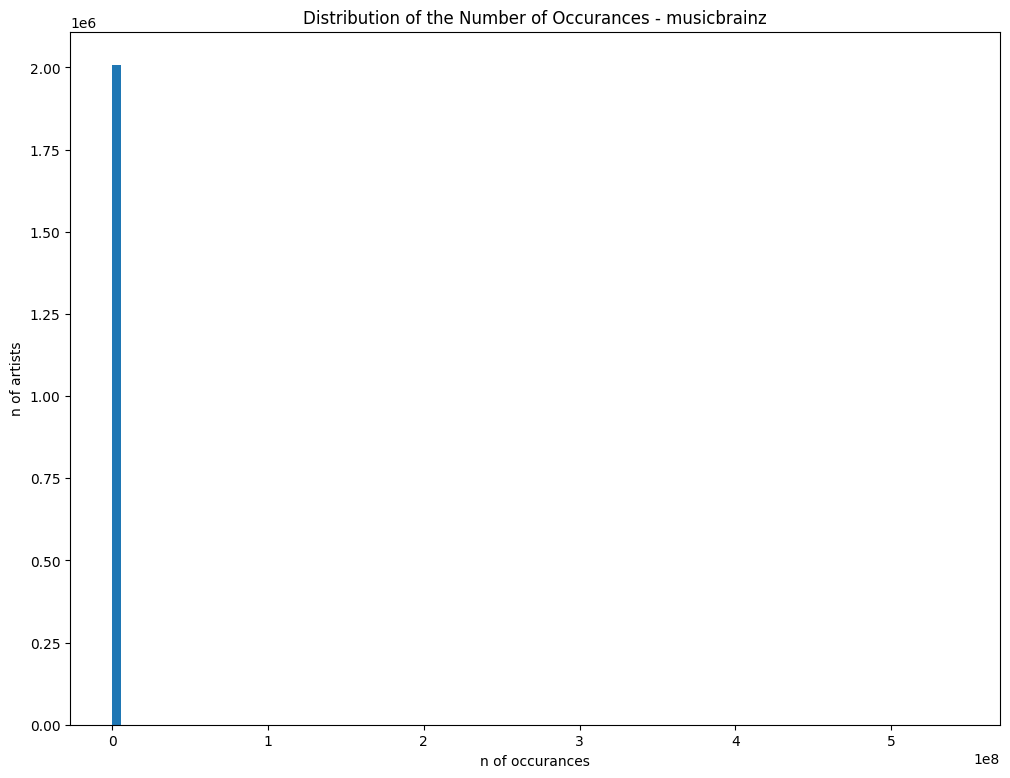

In [39]:
# musicbrainz
musicbrainz_freq = FrequencyCheck('musicbrainz')
musicbrainz_freq.check_occurance_by_range(1e8)
musicbrainz_freq.visualize()